- Schrödinger equation

$$
\frac{d^2\psi}{dx^2} = - \frac{2m}{\hbar^2}(E-V)\psi
$$

- Dimensionless form

$$
\frac{d^2\psi}{dz^2} = - (\epsilon-W)\psi
$$


- Simple harmonic oscillator (SHO)
    - $V(x) = \frac{1}{2}Cx^2$
    - $\psi_n(x) \sim H_n(x/a)e^{-x^2/2a^2}$
    - $E_n(x) = (n+\frac{1}{2})\hbar\omega_0$
        - $n$ is a quantum number (0, 1, 2, ...)
        - $H_n$ is a Hermite polynomial
        - $\omega_0 = (C/m)^{1/2}$
        - $a = (\hbar/\sqrt{mC})^{1/2} = (\hbar/m\omega_0)^{1/2}$

- Dimensionless form for SHO
    - $\frac{d^2\psi}{dz^2} = - (\epsilon-z^2)\psi$
        - $x=(\hbar/m\omega_0)^{1/2}z=az$
        - $E=\frac{1}{2}\hbar\omega_0\epsilon$
        - $V = \frac{1}{2}\hbar\omega_0 W$
        - $W(z) = z^2$
        - $\psi_n(x) \sim H_n(z)e^{-z^2/2}$
    - The permitted energies are $\epsilon=1, 3, 5, \cdots$

- Difference equation
$$
\psi_{j+1} = (2-(\Delta z)^2(\epsilon-W_j))\psi_j - \psi_{j-1}
$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

In [ ]:
# input energy, mesh size, zmax, psi(0), psi(1)
e, s, m, p1, p2 = 5.04, 0.01, 6, 1, 1
print("z     psi(z)")
i = 1
z = 2*s
while z <= m:
    v = z*z
    p3 = (2 - (e-v)*s*s)*p2 - p1 

    i = i + 1
    if i >= 20:
        print(f'{z:.1f}  {p3:<8.6g}')
        i = 0
    
    p1 = p2
    p2 = p3
    z = z + s 

z     phi(z)
0.2  0.905905
0.4  0.633892
0.6  0.240129
0.8  -0.198401
1.0  -0.603615
1.2  -0.914184
1.4  -1.09657
1.6  -1.14716
1.8  -1.0866 
2.0  -0.949612
2.2  -0.774167
2.4  -0.593038
2.6  -0.429217
2.8  -0.295074
3.0  -0.194162
3.2  -0.124261
3.4  -0.0805367
3.6  -0.058229
3.8  -0.0549289
4.0  -0.0732 
4.2  -0.125382
4.4  -0.244863
4.6  -0.514606
4.8  -1.14182
5.0  -2.6598 
5.2  -6.49259
5.4  -16.5928
5.6  -44.3704
5.8  -124.088
6.0  -362.784


In [ ]:
# input energy, mesh size, zmax, psi(0), psi(1)
def sho(e, s=0.01, m=6, p1=1, p2=1):
    z = 2*s
    zs = []
    psis = []
    while z <= m:
        v = z*z
        p3 = (2 - (e-v)*s*s)*p2 - p1 
        zs.append(z)
        psis.append(p3)
        p1 = p2
        p2 = p3
        z = z + s 
    return np.array(zs), np.array(psis)

zs, psis = sho(5.04, 0.01, 6, 1, 1)
zs[18], psis[18]

(0.20000000000000004, 0.9059054545718084)

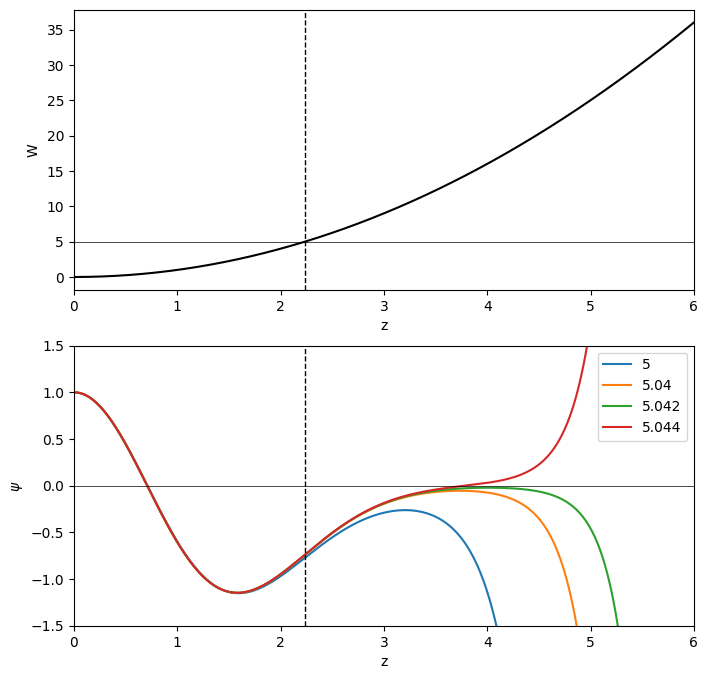

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(zs, zs**2, label='z^2', color='black')
plt.xlim(0, 6)
plt.axhline(5, color='black', lw=0.5)
plt.axvline(np.sqrt(5), color='black', lw=1, ls='--')
plt.xlabel('z')
plt.ylabel('W')

plt.subplot(2, 1, 2, sharex=plt.gca())
plt.plot(*sho(5), label='5')
plt.plot(*sho(5.04), label='5.04')
plt.plot(*sho(5.042), label='5.042')
plt.plot(*sho(5.044), label='5.044')
plt.ylim(-1.5, 1.5)
plt.xlim(0, 6)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(np.sqrt(5), color='black', lw=1, ls='--')
plt.xlabel('z')
plt.ylabel(r'$\psi$')
plt.legend()
plt.show()

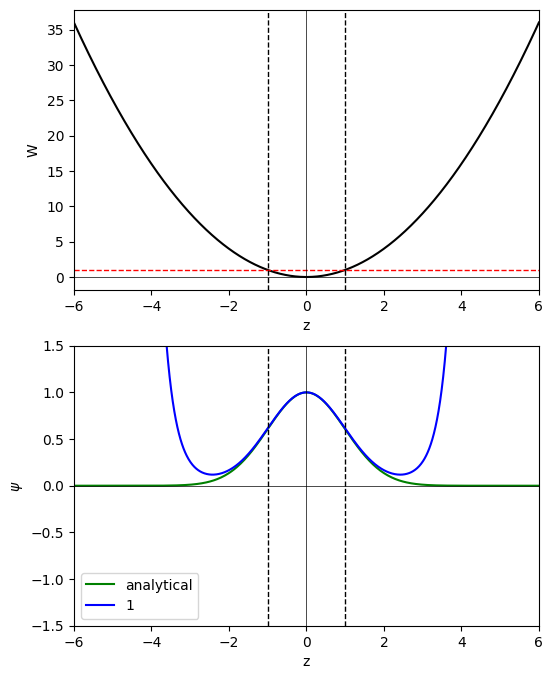

In [ ]:
e, s, m, p1, p2 = 1, 0.01, 6, 1, 1
iseven = True

plt.figure(figsize=(6, 8))
plt.subplot(2, 1, 1)
plt.plot(zs, zs**2, label='z^2', color='black')
plt.plot(-zs[::-1], zs[::-1]**2, color='black')
plt.xlim(-6, 6)
plt.axhline(e, color='red', lw=1, ls='--')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.axvline(np.sqrt(e), color='black', lw=1, ls='--')
plt.axvline(-np.sqrt(e), color='black', lw=1, ls='--')
plt.xlabel('z')
plt.ylabel('W')

plt.subplot(2, 1, 2, sharex=plt.gca())
z = np.linspace(-6, 6, 500)
p_monic = special.hermite(0, monic=True)
plt.plot(z, p_monic(z)*np.exp(-z**2/2), label='analytical', color='green')

zs, psis = sho(e, s, m, p1, p2)
plt.plot(zs, psis, label=f'{e}', color='blue')
psi_mirror = psis[::-1] if iseven else -psis[::-1]
plt.plot(-zs[::-1], psi_mirror, color='blue')
plt.ylim(-1.5, 1.5)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.axvline(np.sqrt(e), color='black', lw=1, ls='--')
plt.axvline(-np.sqrt(e), color='black', lw=1, ls='--')
plt.xlabel('z')
plt.ylabel(r'$\psi$')

plt.legend()
plt.show()

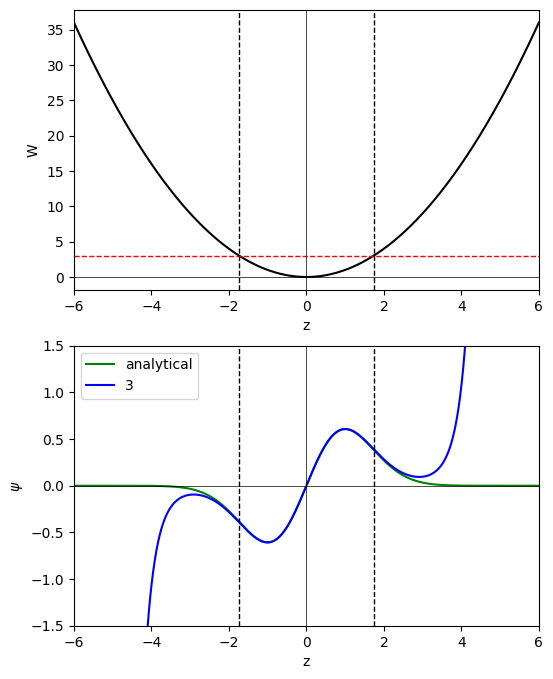

In [ ]:
e, s, m, p1, p2 = 3, 0.01, 6, 0, 0.01
iseven = False

plt.figure(figsize=(6, 8))
plt.subplot(2, 1, 1)
plt.plot(zs, zs**2, label='z^2', color='black')
plt.plot(-zs[::-1], zs[::-1]**2, color='black')
plt.xlim(-6, 6)
plt.axhline(e, color='red', lw=1, ls='--')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.axvline(np.sqrt(e), color='black', lw=1, ls='--')
plt.axvline(-np.sqrt(e), color='black', lw=1, ls='--')
plt.xlabel('z')
plt.ylabel('W')

plt.subplot(2, 1, 2, sharex=plt.gca())
z = np.linspace(-6, 6, 500)
p_monic = special.hermite(1, monic=True)
plt.plot(z, p_monic(z)*np.exp(-z**2/2), label='analytical', color='green')

zs, psis = sho(e, s, m, p1, p2)
plt.plot(zs, psis, label=f'{e}', color='blue')
psi_mirror = psis[::-1] if iseven else -psis[::-1]
plt.plot(-zs[::-1], psi_mirror, color='blue')
plt.ylim(-1.5, 1.5)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.axvline(np.sqrt(e), color='black', lw=1, ls='--')
plt.axvline(-np.sqrt(e), color='black', lw=1, ls='--')
plt.xlabel('z')
plt.ylabel(r'$\psi$')
plt.legend()
plt.show()

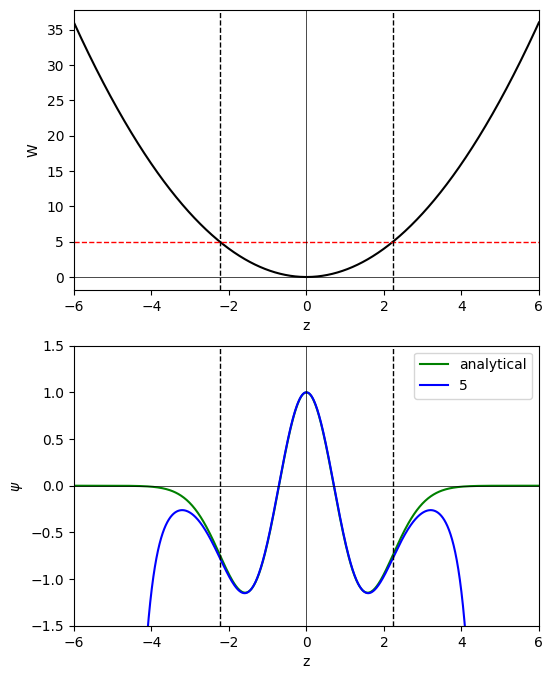

In [ ]:
e, s, m, p1, p2 = 5, 0.01, 6, 1, 1
iseven = True

plt.figure(figsize=(6, 8))
plt.subplot(2, 1, 1)
plt.plot(zs, zs**2, label='z^2', color='black')
plt.plot(-zs[::-1], zs[::-1]**2, color='black')
plt.xlim(-6, 6)
plt.axhline(e, color='red', lw=1, ls='--')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.axvline(np.sqrt(e), color='black', lw=1, ls='--')
plt.axvline(-np.sqrt(e), color='black', lw=1, ls='--')
plt.xlabel('z')
plt.ylabel('W')

plt.subplot(2, 1, 2, sharex=plt.gca())
z = np.linspace(-6, 6, 500)
p_monic = -0.5*special.hermite(2)
plt.plot(z, p_monic(z)*np.exp(-z**2/2), label='analytical', color='green')

zs, psis = sho(e, s, m, p1, p2)
plt.plot(zs, psis, label=f'{e}', color='blue')
psi_mirror = psis[::-1] if iseven else -psis[::-1]
plt.plot(-zs[::-1], psi_mirror, color='blue')
plt.ylim(-1.5, 1.5)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.axvline(np.sqrt(e), color='black', lw=1, ls='--')
plt.axvline(-np.sqrt(e), color='black', lw=1, ls='--')
plt.xlabel('z')
plt.ylabel(r'$\psi$')
plt.legend()
plt.show()